In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("C:/Users/nilsm/MakeAIWork/projects/project1/csv_files/data_frame.csv")
df.head()

,Unnamed: 0,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,4,84.0,187.0,89.0,2.0,12.0,0.0,2,83


In [52]:
# remove extra index column 
df = df.drop(['Unnamed: 0'],axis=1)
# gather information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8191 non-null   float64
 1   length    8190 non-null   float64
 2   mass      8191 non-null   float64
 3   exercise  8191 non-null   float64
 4   smoking   8191 non-null   float64
 5   alcohol   8191 non-null   float64
 6   sugar     8192 non-null   int64  
 7   lifespan  8192 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 512.1 KB


In [53]:
# more information!
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,8191.000000,8190.000000,8191.000000,8191.000000,8191.000000,8191.000000,8192.000000,8192.000000
mean,79.967770,183.642735,79.794286,1.617141,9.773776,5.748260,2.423340,76.096069
std,1.634992,12.600441,12.076801,0.830975,6.967164,2.664489,0.950095,10.918167
min,76.000000,154.000000,60.000000,0.000000,0.000000,0.000000,1.000000,40.000000
25%,79.000000,174.000000,70.000000,1.000000,3.000000,4.000000,2.000000,68.000000
50%,80.000000,183.000000,79.000000,1.000000,10.000000,6.000000,2.000000,76.000000
75%,81.000000,193.000000,88.000000,2.000000,16.000000,8.000000,3.000000,83.000000
max,84.000000,214.000000,112.000000,4.000000,22.000000,10.000000,5.000000,113.000000


In [54]:
# check for duplicates.

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


In [55]:
# check for missing values

print(df.isnull().sum())

genetic     1
length      2
mass        1
exercise    1
smoking     1
alcohol     1
sugar       0
lifespan    0
dtype: int64


In [56]:
# remove the missing values (there aren't many so we won't miss them)
df = df.dropna()
df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83


<AxesSubplot: xlabel='lifespan'>

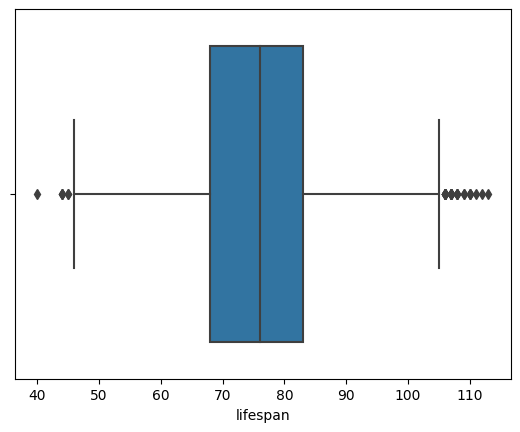

In [57]:
# checking outliers

sns.boxplot(x=df['lifespan'])

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
genetic,1.000000,-0.002151,-0.010059,0.004464,-0.011032,0.003612,-0.006626,0.152144
length,-0.002151,1.000000,0.017750,-0.007252,-0.008966,0.006750,-0.015262,0.179911
mass,-0.010059,0.017750,1.000000,0.004304,0.016148,-0.002182,0.006780,-0.201487
exercise,0.004464,-0.007252,0.004304,1.000000,-0.012758,0.005955,-0.009249,0.677365
smoking,-0.011032,-0.008966,0.016148,-0.012758,1.000000,0.001413,-0.001368,-0.525613
alcohol,0.003612,0.006750,-0.002182,0.005955,0.001413,1.000000,0.013864,-0.216818
sugar,-0.006626,-0.015262,0.006780,-0.009249,-0.001368,0.013864,1.000000,-0.263895
lifespan,0.152144,0.179911,-0.201487,0.677365,-0.525613,-0.216818,-0.263895,1.000000


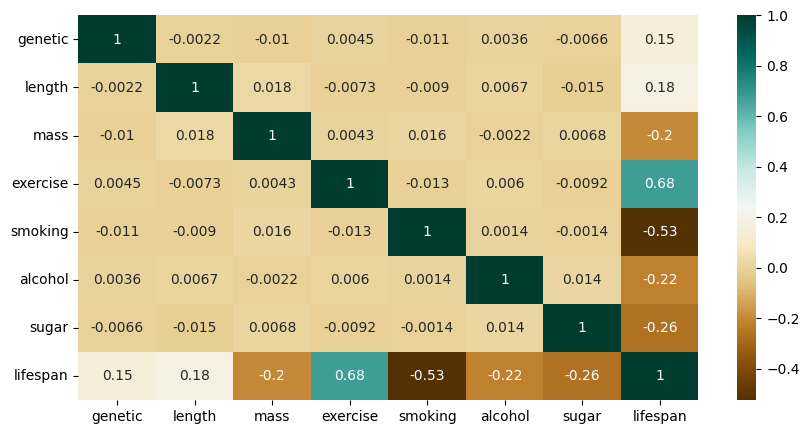

In [58]:
# checking the relevance

plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [59]:
# removing outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)
df2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

genetic      79.0
length      174.0
mass         70.0
exercise      1.0
smoking       3.0
alcohol       4.0
sugar         2.0
lifespan     68.0
Name: 0.25, dtype: float64

genetic      81.0
length      193.0
mass         88.0
exercise      2.0
smoking      16.0
alcohol       8.0
sugar         3.0
lifespan     83.0
Name: 0.75, dtype: float64

genetic      2.0
length      19.0
mass        18.0
exercise     1.0
smoking     13.0
alcohol      4.0
sugar        1.0
lifespan    15.0
dtype: float64


In [62]:
# no more max lifespan of 113, overall it looks a bit more manageble
df2.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,79.966281,183.647207,79.780196,1.588827,9.780070,5.746603,2.385254,75.957977
std,1.636802,12.610796,12.065397,0.796074,6.954557,2.664393,0.899250,10.602938
min,76.000000,154.000000,60.000000,0.000000,0.000000,0.000000,1.000000,46.000000
25%,79.000000,174.000000,70.000000,1.000000,3.000000,4.000000,2.000000,68.000000
50%,80.000000,183.000000,79.000000,1.000000,10.000000,6.000000,2.000000,76.000000
75%,81.000000,193.000000,88.000000,2.000000,16.000000,8.000000,3.000000,83.000000
max,84.000000,214.000000,112.000000,3.000000,22.000000,10.000000,4.000000,105.000000


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
genetic,1.000000,-0.005661,-0.009111,0.003265,-0.009462,0.004965,-0.004766,0.153073
length,-0.005661,1.000000,0.022425,-0.008460,-0.004785,0.008196,-0.013823,0.179178
mass,-0.009111,0.022425,1.000000,0.005708,0.011893,-0.002841,-0.000208,-0.200942
exercise,0.003265,-0.008460,0.005708,1.000000,-0.008494,0.008715,0.002287,0.664784
smoking,-0.009462,-0.004785,0.011893,-0.008494,1.000000,-0.003578,-0.005384,-0.532308
alcohol,0.004965,0.008196,-0.002841,0.008715,-0.003578,1.000000,0.007558,-0.216189
sugar,-0.004766,-0.013823,-0.000208,0.002287,-0.005384,0.007558,1.000000,-0.245873
lifespan,0.153073,0.179178,-0.200942,0.664784,-0.532308,-0.216189,-0.245873,1.000000


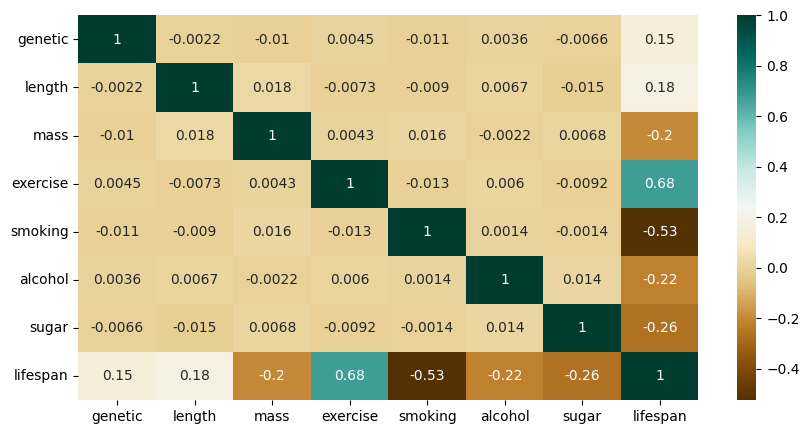

In [60]:
# checking relevance without outliers

plt.figure(figsize=(10,5))
c2= df2.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c2

In [63]:
# save the cleaned up data as csv for future use
c2.to_csv("C:/Users/nilsm/MakeAIWork/projects/project1/csv_files/data_clean.csv")